In [117]:
from epynet import Network
import numpy as np
import math as m
import operator
#import pandas as pd
#import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src/')
from network_grouping import *

In [118]:
inp = "../input/santaizabel0118.inp"

net = Network(inp)
keys = net.nodes.keys()   # List with uids of each node
all_nodes = [net.nodes[key] for key in keys]   # List of all possible nodes 
net.ep.ENclose()
    
[all_nodes.remove(n) for n in all_nodes if n.node_type != "Junction"]  # Remove elements that are not Junction in all_nodes
node_list = [n.uid for n in all_nodes] 
n_nodes = len(node_list)
    
y_simulated = simulation(inp)
y_simulated = y_simulated[0,:,:]

y_simulated.shape

print n_nodes

442


In [121]:
def map_nodes (inp, intensity, n_tons):
    group = []

    net = Network(inp)
    keys = net.nodes.keys()   # List with uids of each node
    all_nodes = [net.nodes[key] for key in keys]   # List of all possible nodes 
    net.ep.ENclose()

    [all_nodes.remove(n) for n in all_nodes if n.node_type != "Junction"]  # Remove elements that are not Junction in all_nodes
    node_list = [n.uid for n in all_nodes] 
    n_nodes = len(node_list)

    size = n_nodes/n_tons  # intervalo em que os valores serão separados em um mesmo grupo
    
    node_value = [[node_list[indice], intensity[indice]] for indice in range(n_nodes)]
    
    node_value = dict(node_value)

    node_value = sorted(node_value.items(), key=operator.itemgetter(1))  # Coloca os valores em ordem crescente, mas os nós 
                                                                         # continuam associados aos valores    
    for i in range(n_tons-1):
        group = group + size*[i]

    group = group + (n_nodes - i*size)*[i + 1]    # o ultimo grupo ficara com a parte dele e os nós restantes, se tiver

    value_degrade = dict([[node_value[indice][0], group[indice]] for indice in range(n_nodes)])

    return value_degrade

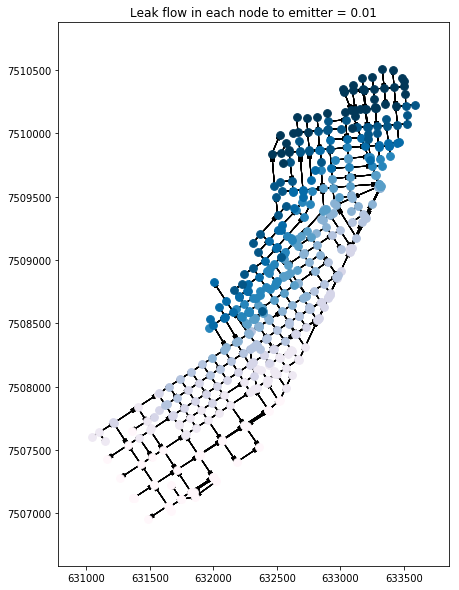

In [140]:
# Fixed a emitter value obtain the leak flow in each node

emitter = 0.01  # l/s por mca 
coef_emitter = 0.5

leak_flow = emitter * (y_simulated ** coef_emitter)
leak_flow = np.mean(leak_flow, axis = 1)    # l/s          

#print leak_flow

n_tons = 10
intensity = leak_flow 

value_degrade = map_nodes(inp, intensity, n_tons)

net = inp_to_graph(inp)
cmap = plt.cm.get_cmap('PuBu', n_tons)
   
for i_groups in range(n_tons):    
        node_list = [key for key in value_degrade.keys() if value_degrade[key] == i_groups] # List of all nodes in i_groups
           
        # Visualize the network:
        draw_networkx(net, with_labels=False, pos=net.graph['COORDINATES'], node_size=60, nodelist = node_list,
                node_color = cmap(i_groups))
            
fig_size = [0,0]
fig_size[0] = 7
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.title ("Leak flow in each node to emitter = 0.01")
fig_size
#plt.savefig(str(inp)+ str(n_groups) + 'groups.png')
plt.show()

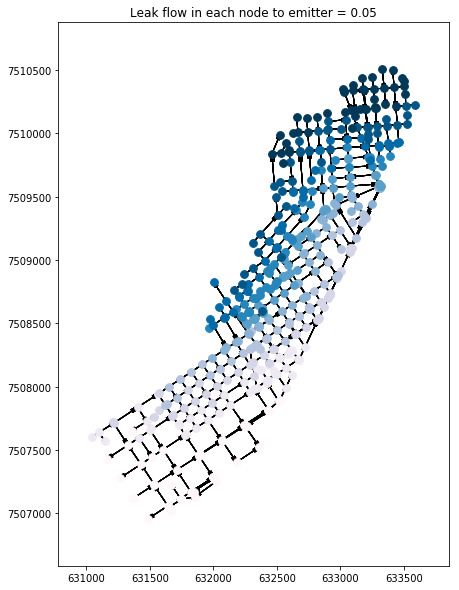

In [141]:
emitter = 0.05  # l/s por mca 
coef_emitter = 0.5

leak_flow = emitter * (y_simulated ** coef_emitter)
leak_flow = np.mean(leak_flow, axis = 1)    # l/s          

#print leak_flow

n_tons = 10
intensity = leak_flow 

value_degrade = map_nodes(inp, intensity, n_tons)

net = inp_to_graph(inp)
cmap = plt.cm.get_cmap('PuBu', n_tons)
   
for i_groups in range(n_tons):    
        node_list = [key for key in value_degrade.keys() if value_degrade[key] == i_groups] # List of all nodes in i_groups
           
        # Visualize the network:
        draw_networkx(net, with_labels=False, pos=net.graph['COORDINATES'], node_size=60, nodelist = node_list,
                node_color = cmap(i_groups))
            
fig_size = [0,0]
fig_size[0] = 7
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.title ("Leak flow in each node to emitter = 0.05")
fig_size
#plt.savefig(str(inp)+ str(n_groups) + 'groups.png')
plt.show()

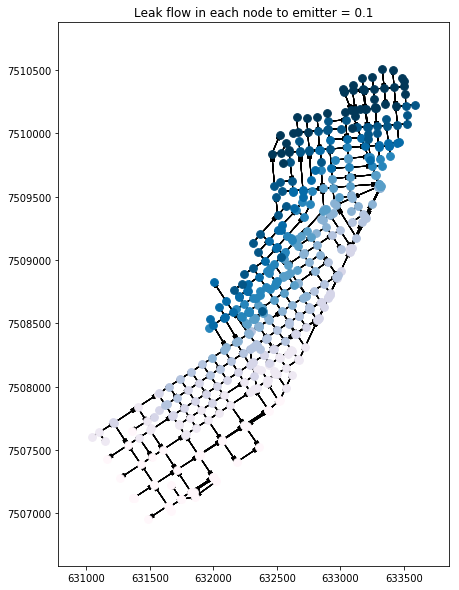

In [142]:
emitter = 0.1  # l/s por mca 
coef_emitter = 0.5

leak_flow = emitter * (y_simulated ** coef_emitter)
leak_flow = np.mean(leak_flow, axis = 1)    # l/s          

#print leak_flow

n_tons = 10
intensity = leak_flow 

value_degrade = map_nodes(inp, intensity, n_tons)

net = inp_to_graph(inp)
cmap = plt.cm.get_cmap('PuBu', n_tons)
   
for i_groups in range(n_tons):    
        node_list = [key for key in value_degrade.keys() if value_degrade[key] == i_groups] # List of all nodes in i_groups
           
        # Visualize the network:
        draw_networkx(net, with_labels=False, pos=net.graph['COORDINATES'], node_size=60, nodelist = node_list,
                node_color = cmap(i_groups))
            
fig_size = [0,0]
fig_size[0] = 7
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.title ("Leak flow in each node to emitter = 0.1")
fig_size
#plt.savefig(str(inp)+ str(n_groups) + 'groups.png')
plt.show()

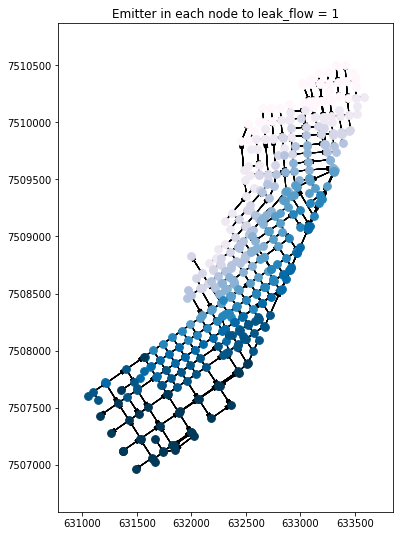

In [138]:
# Fixed a leak_flow obtain the emitter values

flow = 1  # l/s 
coef_emitter = 0.5

emitters = flow/(y_simulated ** coef_emitter)
emitters = np.mean(emitters, axis = 1)           

#print emitters

n_tons = 10
intensity = emitters

value_degrade = map_nodes(inp, intensity, n_tons)

net = inp_to_graph(inp)
cmap = plt.cm.get_cmap('PuBu', n_tons)
   
for i_groups in range(n_tons):    
        node_list = [key for key in value_degrade.keys() if value_degrade[key] == i_groups] # List of all nodes in i_groups
           
        # Visualize the network:
        draw_networkx(net, with_labels=False, pos=net.graph['COORDINATES'], node_size=60, nodelist = node_list,
                node_color = cmap(i_groups))
            
fig_size = [0,0]
fig_size[0] = 7
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig_size
plt.title ("Emitter in each node to leak_flow = 1")
#plt.savefig(str(inp)+ str(n_groups) + 'groups.png')
plt.show()